# Interactive Data Exploration with SPRING

<table style="width:100%">
  <tr>
    <th>Gene_Exploration</th>
    <th>Cluster_Visualization</th> 
    <th>Pseudotime</th>
  </tr>
  <tr>
    <td><img src="Krumsiek_Gene.png", height="420" width="680"> </td>
    <td><img src="Krumiek_Clusters.png" , height="420" width="680"> </td>
    <td><img src="Krumsiek_Pseudotime.png", height="420" width="680" > </td>
  </tr>
</table>



This notebook shows how to interactively explore data in SPRING and explores results of the Krumsiek and the Seurat data sets. SPRING is an interactive, browser-based visualization tool designed for single-cell RNA-analysis that uses force directed methods to visualize high-dimensional data in 3D. 

The Scanpy SPRING export function supports tracking of differential gene expression for genes - especially marker genes, categorical colorings for e.g. clustering of the data and individual color tracks for e.g. visualization and exploration of Diffusion Pseudotime results. 





## SPRING setup & Prerequesites

We use the tool programmed by the Allon-Klein Lab that can be found here:

https://github.com/AllonKleinLab/SPRING

Clone the repository to your preferred destination folder. It is recommendable that the folder is easily accessible. 

Make sure that http.server (Python 3) is installed (SimpleHTTPServer is outdated and Scanpy requires version 3.5 or higher anyway).

    pip install http.server   



## Using the export function in Scanpy

The SPRING Tool requires a number of CSV and JSON files to be written in a folder structure. The basic export is done by calling 

    save_spring_dir(adata,project_directory,k=30, D=None, custom_color_tracks=None, cell_groupings=None, use_genes=[])
    
    
after calling: 

    from scanpy.exporting import save_spring_dir


__adata__ is an AnnData object

__project_directory__ defines the destination folder of the written files (relative to the current postion of the program calling the function)

__k__ defines the k for which a k-nearest-neighbour graph will be built that is used to visualize data. 

__D__ is an optional parameter that can contain a different distance matrix. If used, it should be a $n\times n$ matrix, where $n$ is the number of cells in the AnnData object

__custom_color_tracks__ and __cell_groupings__ are optional parameters that contain either a string or a list of strings that are used to access adata annotation for the custom color_tracks or, respectively, categorical coloring. 

__use_genes__ is an optional parameter that contains a list of genes used for coloring. If empty, all genes are used. Eleswise, gene names should be consistent with those in adata.var_names

## Calling SPRING and exploring the results

After writing all necessary files using 

    save_spring_dir()
    
call (in bash or comparable) 
    
    python3 -m http.server 8000 &

This opens a local virtual server that is necessary for SPRING to work. No, in a browser, open 

    http://localhost:8000/<Path_To_SPRING>/springViewer.html?<RelativePath_To_ProjectDirectory>

so e.g.:

    http://localhost:8000/SPRING/springViewer.html?../scanpy/krumsiek

The first path is the one relative to the 'server postion', i.e. relative to the folder in which the http.server was opened. 

The second path is relative to the SPRING directory. Therefore, storing project_directory close to or in SPRING simplifies matters. 

Now the simulation should start. For large datasets it may need a few minutes until all genes are loaded and the simulation has reached an equilibrium. 

For an explanation of SPRING, see 

https://github.com/AllonKleinLab/SPRING

or see the HELP! Page in SPRING.

## Example Case: Krumsiek Data set


In [2]:
from scanpy.exporting import save_spring_dir
import scanpy.api as sc
import numpy as np
sc.settings.verbosity = 3                # verbosity = 3: errors, warnings, info, hints
sc.settings.set_figure_params(dpi=80)    # dots (pixels) per inch determine size of inline figures

In [3]:
adata_krumsiek11 = sc.datasets.krumsiek11()

--> you can reproduce the data file /home/tobias/Documents/scanpy/scanpy/datasets/krumsiek11.txt by running `sc.tl.sim("krumsiek11")`
reading ./write/data/home/tobias/Documents/scanpy/scanpy/datasets/krumsiek11.h5


In [4]:
sc.tl.draw_graph(adata_krumsiek11)
sc.tl.louvain(adata_krumsiek11, n_neighbors=10, resolution=1.3, recompute_graph=True)

drawing single-cell graph using layout "fr"
    using data matrix X directly for building graph (no PCA)
    computing data graph with n_neighbors = 30 
    computing spectral decomposition ("diffmap") with 15 components
    eigenvalues of transition matrix
    [ 1.            0.998418808   0.9969582558  0.9920811653  0.9909049273
      0.9824624062  0.9651805162  0.9614249468  0.9520583153  0.9385528564
      0.9172899127  0.9089726806  0.8958978653  0.8761963248  0.8536654115]
    finished (0:00:04.025) and added
    "X_draw_graph_fr", graph_drawing coordinates (adata.smp)
    "draw_graph_layout", the chosen layout (adata.add)
running Louvain clustering
    using data matrix X directly for building graph (no PCA)
    computing data graph with n_neighbors = 10 
    computing spectral decomposition ("diffmap") with 15 components
    eigenvalues of transition matrix
    [ 1.            0.9997081757  0.9995225072  0.9988661408  0.9987463355
      0.9967362285  0.9950016141  0.9936144352 

In [5]:
adata_krumsiek11.add['iroot'] = 0
sc.tl.dpt(adata_krumsiek11, n_branchings=2, n_neighbors=5, knn=False)

perform Diffusion Pseudotime analysis
    using data matrix X directly for building graph (no PCA)
    computing data graph with n_neighbors = 5 
    computing spectral decomposition ("diffmap") with 10 components
    eigenvalues of transition matrix
    [ 1.            0.9999370575  0.9999125004  0.9998248816  0.9997677207
      0.9993129373  0.9989748001  0.9986641407  0.9982346892  0.9980639219]
    this uses a hierarchical implementation
    detect 2 branchings
    do not consider groups with less than 6 points for splitting
    branching 1: split group 0
    branching 2: split group 0
finished (0:00:00.531) and added
    "dpt_pseudotime", the pseudotime (adata.smp),
    "dpt_groups", the branching subgroups of dpt (adata.smp)
    "dpt_order", order according to groups and increasing pseudtime (adata.smp)


The draw_graph function in scanpy uses the same algorithm as SPRING. Results are comparable, but Python visualization is not interactive.

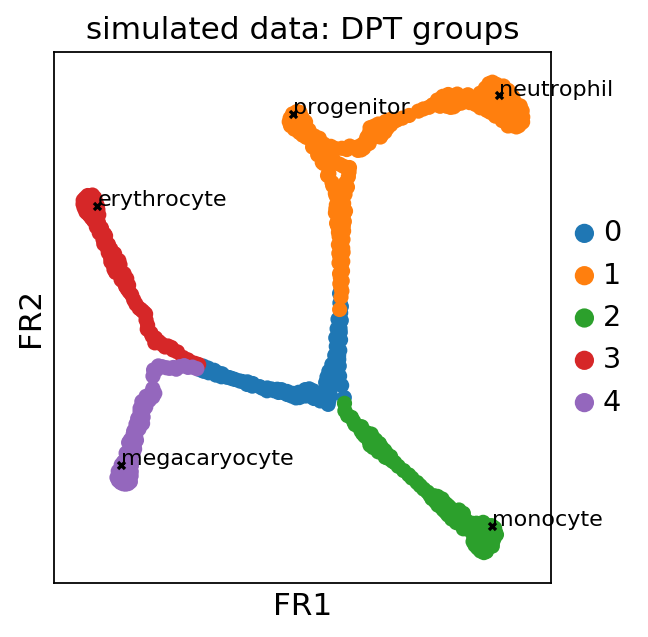

In [6]:
ax = sc.pl.draw_graph(adata_krumsiek11, color='dpt_groups', title='simulated data: DPT groups')

In [7]:
cd

/home/tobias


In [8]:
save_spring_dir(adata_krumsiek11,'./Documents/scanpy/krumsiek', cell_groupings='dpt_groups', custom_color_tracks='dpt_pseudotime')

    using data matrix X directly for building graph (no PCA)
    computing data graph with n_neighbors = 30 
    computing spectral decomposition ("diffmap") with 15 components
    eigenvalues of transition matrix
    [ 1.            0.998418808   0.9969582558  0.9920811653  0.9909049273
      0.9824624062  0.9651805162  0.9614249468  0.9520583153  0.9385528564
      0.9172899127  0.9089726806  0.8958978653  0.8761963248  0.8536654115]


A visualization of the dataset can be seen at the top. On the left hand side  

## A note on including categorical data and color tracks: 

In order to include color_tracks such as for diffusion pseudotime, adata.smp[__custom_color_tracks__] needs to exist for all keys (if a list, for all list elements).

In order to include categorical data, the following annotation needs to exist for __cell_grouping__ (each element if a list): 

Group key for each cell:

    adata.smp[cell_groupings] 
List of all group keys:

    adata.add[cell_groupings+'order']
Colors for each group key:

    adata.add[cell_groupings+'colors]

In the example above, calling save_spring_dir with __cell_groupings__='louvain_groups' would return an error, since color annotation has not yet been included. In order to include color annotation, call the respective plotting method that corresponds to the cell grouping key. E.g.:

    sc.tl.tsne(adata_krumsiek11)
    sx=sc.pl.louvain(adata_krumsiek)
    
adds color annotation, now the export works as required. However, in this use case, louvain clustering does not yield good results, so the python execution was omitted. 
    

 

## Another example case: Seurat Data Set 

In [ ]:
Analogously to the 